# DBSCAN 

Hands on! Another notebook??? Yes. More toy data? Yes!. Can you guess why? In real life, many datasets are not linearly separable, neither have clear shapes. Datasets for DBSCAN are hard to find, but it usually works great for spacial data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("0",header=None,delim_whitespace=True)

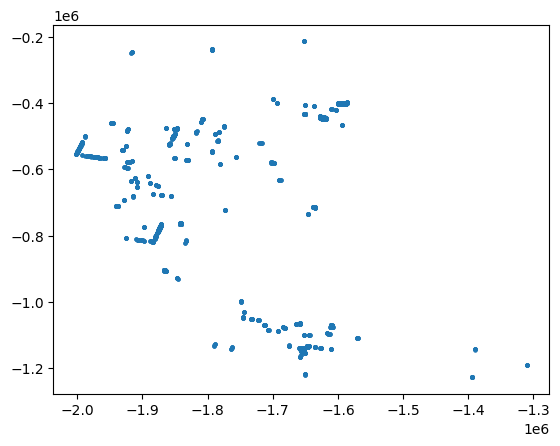

In [3]:
plt.scatter(df[0], df[1],s=5)
plt.show()

In [4]:
#Check the data, is there a need for any preprocessing?
X = df.to_numpy()

In [5]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
clustering = DBSCAN(eps=1000,min_samples=8).fit(X)

In [6]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 89
Estimated number of noise points: 425
Silhouette Coefficient: 0.464


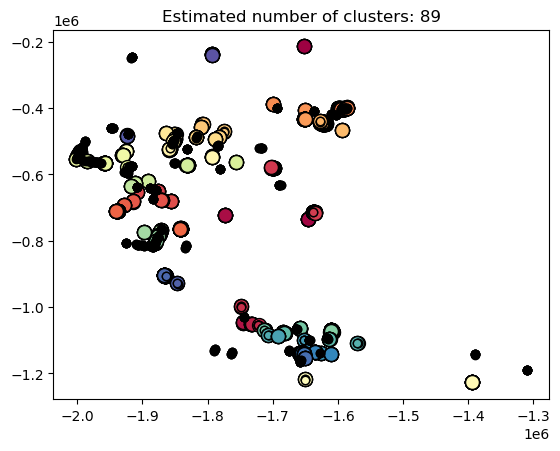

In [7]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Nice! Now find the best $\epsilon$ and min_samples for this dataset.  
After that, repeat the process using the 91 and 33 files.

In [17]:
# Searching for best epsilon and min_samples optimization, most of papers,articles and forums say that a rule of thumb
# for min_samples is to choose it as min_samples ≥ D+1 where D is the number of dimensions of the data, but it can be increased depending
# on the noise inside the data and the size of the data.

min_samples=3

# On the other hand, for epsilon, almost all of the info researched points to the same approach: do a kdistance plot and select the epsilon based
# on the value at the "crook of the elbow", or the point of maximum curvature
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

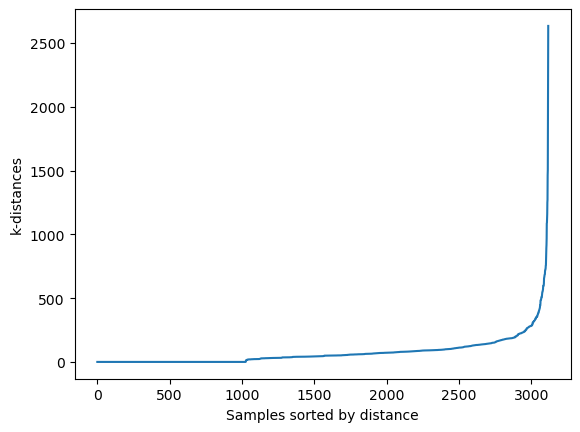

In [18]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylabel("k-distances")
plt.xlabel("Samples sorted by distance")
plt.show()

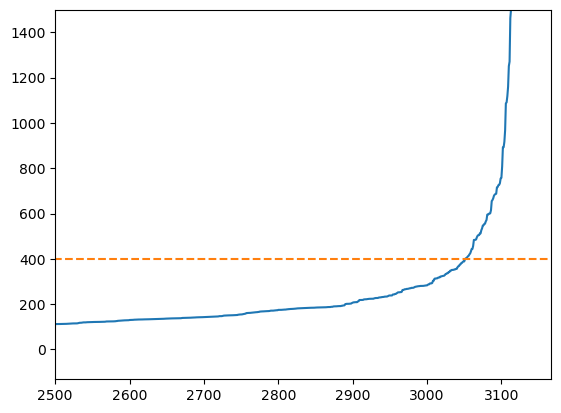

In [19]:
plt.plot(distances)
plt.plot(np.ones(len(distances)+50)*400,'--')
plt.xlim(left=2500,right=len(distances)+50)
plt.ylim(top=1500)
plt.show()

In [20]:
clustering = DBSCAN(eps=400,min_samples=min_samples).fit(X)

In [21]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 202
Estimated number of noise points: 231
Silhouette Coefficient: 0.536


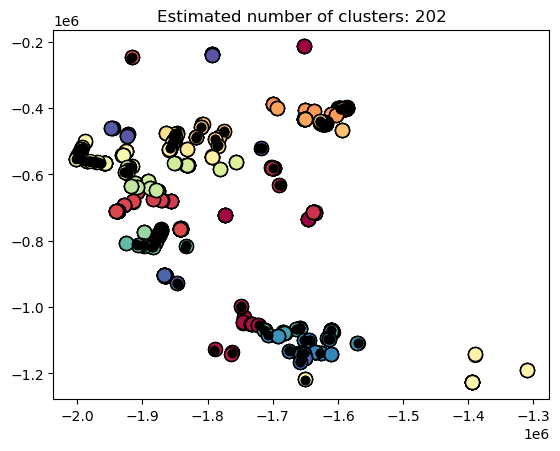

In [22]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

With files 33 and 91

In [24]:
df33 = pd.read_csv("33",header=None,delim_whitespace=True)

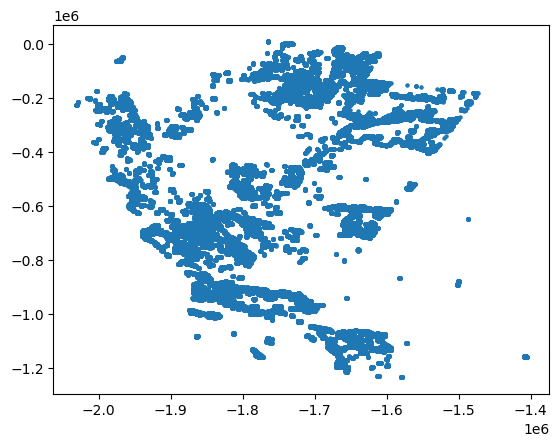

In [25]:
plt.scatter(df33[0], df33[1],s=5)
plt.show()

In [29]:
X33 = df33.to_numpy()

In [59]:
min_samples=3
neighbors33 = NearestNeighbors(n_neighbors=min_samples)
neighbors33_fit = neighbors.fit(X33)
distances33, indices33 = neighbors33_fit.kneighbors(X33)

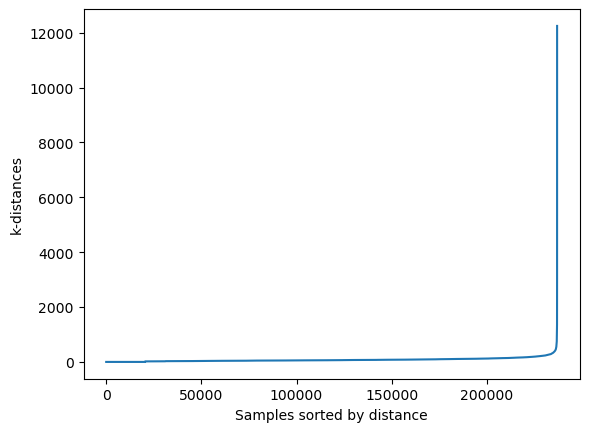

In [60]:
distances33 = np.sort(distances33, axis=0)
distances33 = distances33[:,1]
plt.plot(distances33)
plt.ylabel("k-distances")
plt.xlabel("Samples sorted by distance")
plt.show()

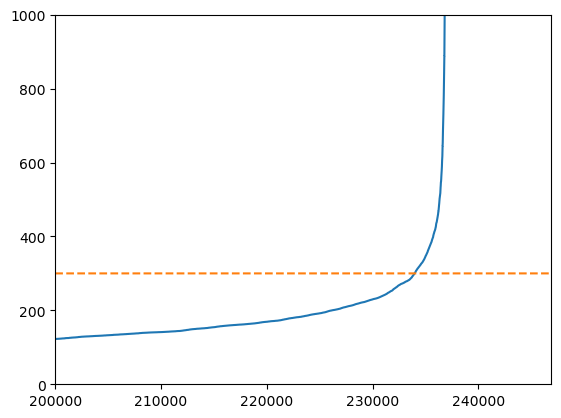

In [61]:
plt.plot(distances33)
plt.plot(np.ones(len(distances33)+10000)*300,'--')
plt.xlim(left=200000,right=len(distances33)+10000)
plt.ylim(top=1000,bottom=0)
plt.show()

In [62]:
clustering = DBSCAN(eps=300,min_samples=min_samples).fit(X33)

In [63]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X33, labels):.3f}")

Estimated number of clusters: 10082
Estimated number of noise points: 6141
Silhouette Coefficient: 0.269


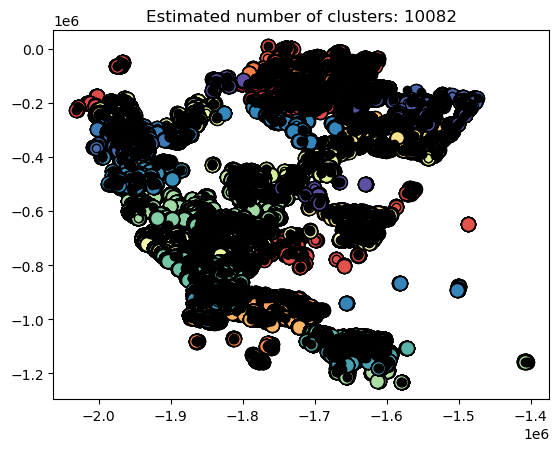

In [65]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X33[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X33[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [67]:
df91 = pd.read_csv("91",header=None,delim_whitespace=True)

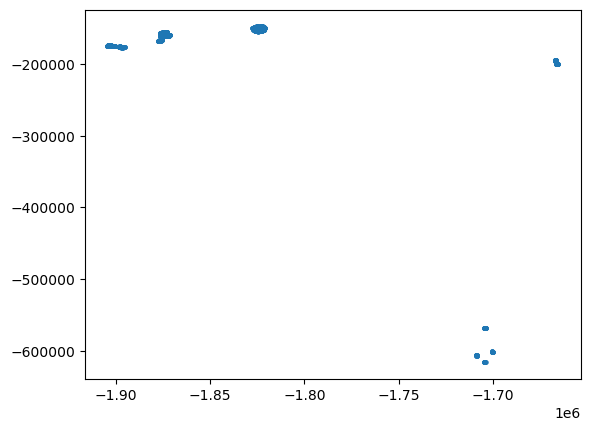

In [68]:
plt.scatter(df91[0], df91[1],s=5)
plt.show()

In [69]:
X91 = df91.to_numpy()

In [71]:
min_samples=3
neighbors91 = NearestNeighbors(n_neighbors=min_samples)
neighbors91_fit = neighbors.fit(X91)
distances91, indices91 = neighbors91_fit.kneighbors(X91)

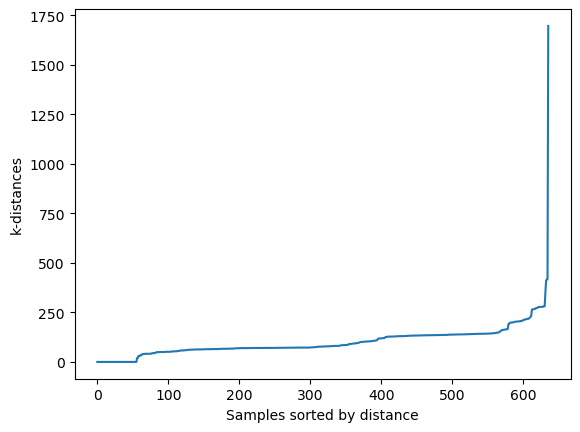

In [72]:
distances91 = np.sort(distances91, axis=0)
distances91 = distances91[:,1]
plt.plot(distances91)
plt.ylabel("k-distances")
plt.xlabel("Samples sorted by distance")
plt.show()

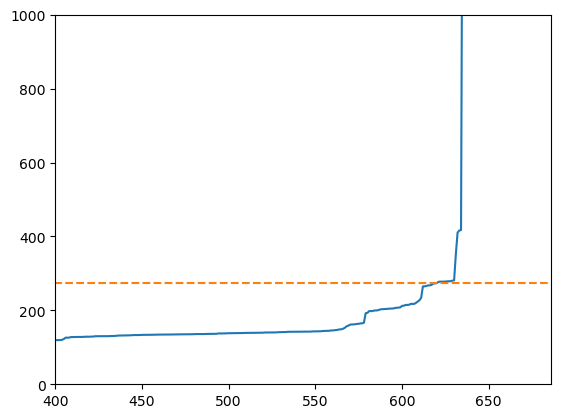

In [76]:
plt.plot(distances91)
plt.plot(np.ones(len(distances91)+50)*275,'--')
plt.xlim(left=400,right=len(distances91)+50)
plt.ylim(top=1000,bottom=0)
plt.show()

In [77]:
clustering = DBSCAN(eps=275,min_samples=min_samples).fit(X91)

In [78]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X91, labels):.3f}")

Estimated number of clusters: 50
Estimated number of noise points: 31
Silhouette Coefficient: 0.460


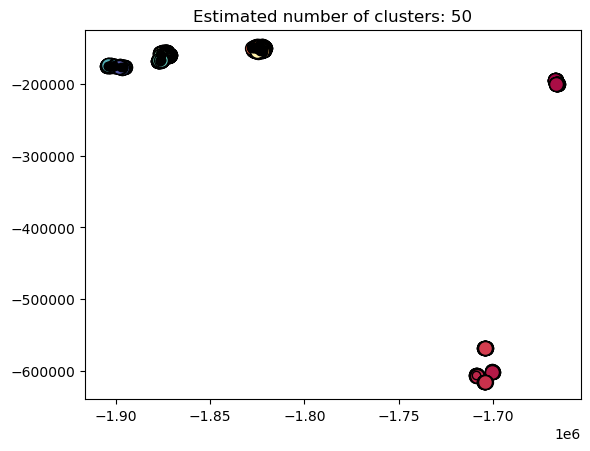

In [79]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X91[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X91[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()